# igraph学习
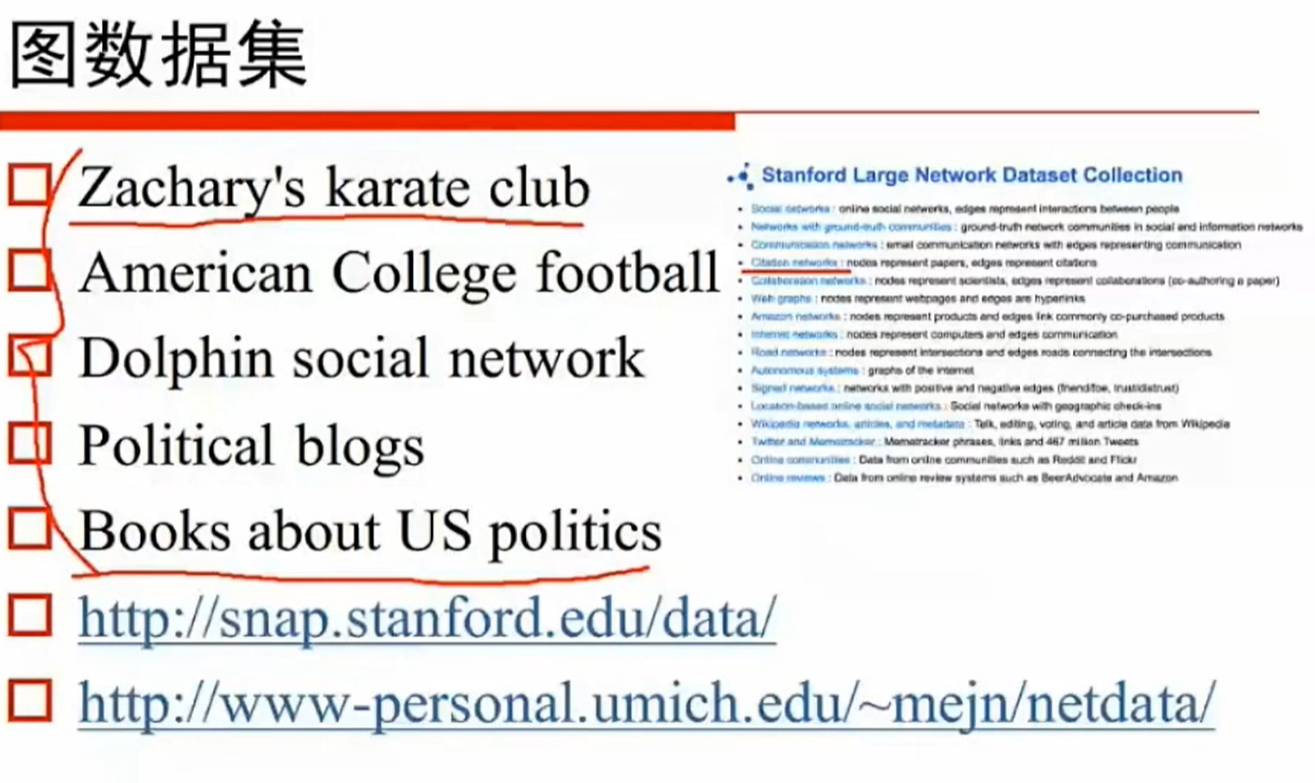

## 社交网络算法-分析指标
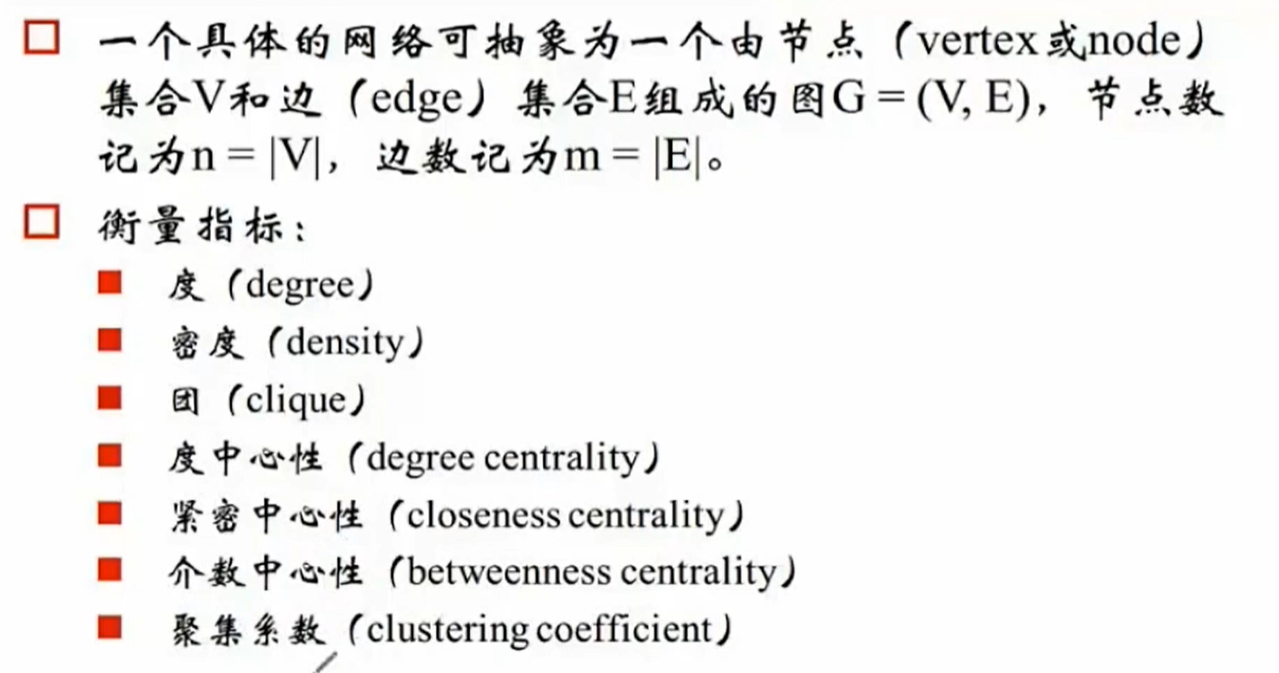

### 团clique

### 社区结构community
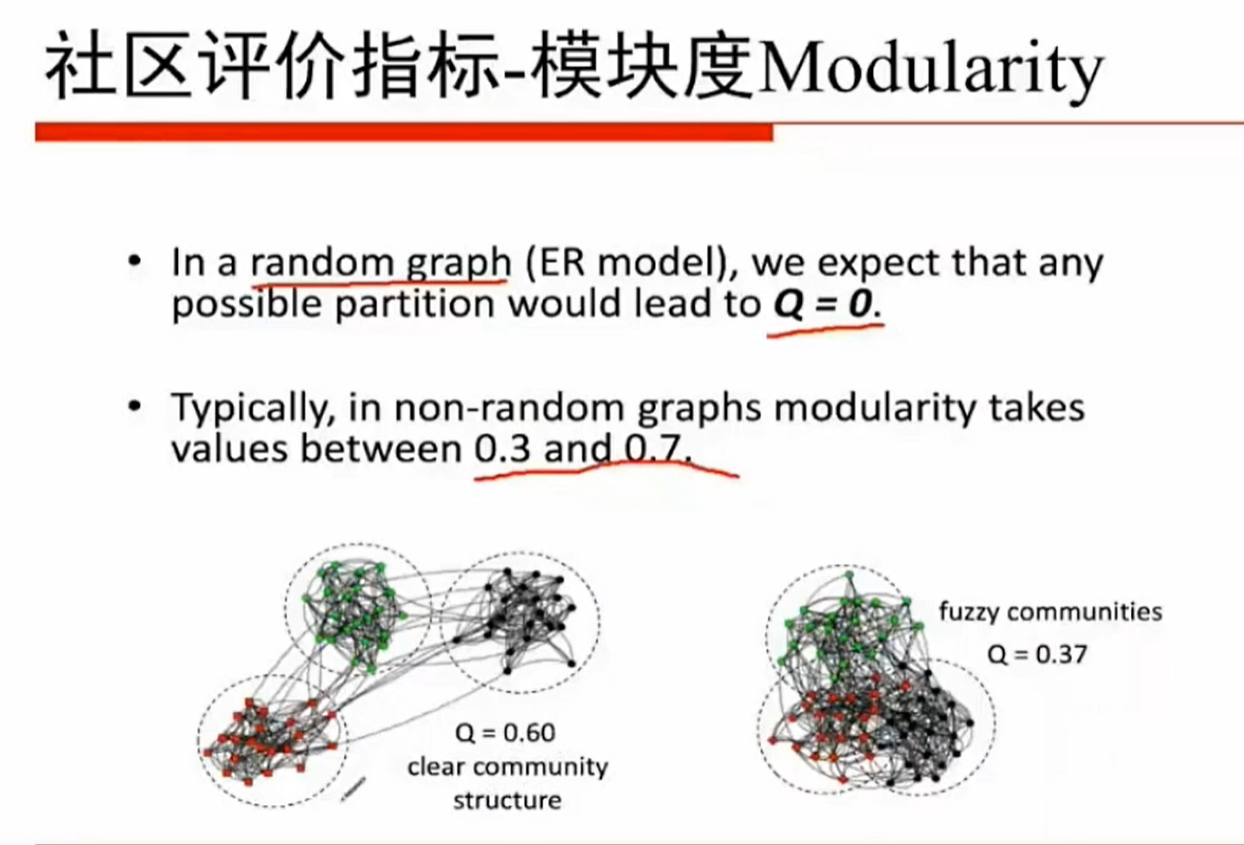

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [7]:
import igraph as ig
import scipy.io as sio
import numpy as np
import leidenalg as la
import random
print(ig.__version__)

0.8.3


In [8]:
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

In [9]:
# 给节点添加一些属性
# Now, let us assume that we want to store the names, ages and genders of people in this network as vertex attributes, 
# and for every connection, we want to store whether this is an informal friendship tie or a formal tie.
g.vs()
g.vs["name"] = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["gender"] = ["f", "m", "f", "m", "f", "m", "m"]
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

In [10]:
list(g.vs())

[igraph.Vertex(<igraph.Graph object at 0x0000016C78DEC318>, 0, {'name': 'Alice', 'age': 25, 'gender': 'f'}),
 igraph.Vertex(<igraph.Graph object at 0x0000016C78DEC318>, 1, {'name': 'Bob', 'age': 31, 'gender': 'm'}),
 igraph.Vertex(<igraph.Graph object at 0x0000016C78DEC318>, 2, {'name': 'Claire', 'age': 18, 'gender': 'f'}),
 igraph.Vertex(<igraph.Graph object at 0x0000016C78DEC318>, 3, {'name': 'Dennis', 'age': 47, 'gender': 'm'}),
 igraph.Vertex(<igraph.Graph object at 0x0000016C78DEC318>, 4, {'name': 'Esther', 'age': 22, 'gender': 'f'}),
 igraph.Vertex(<igraph.Graph object at 0x0000016C78DEC318>, 5, {'name': 'Frank', 'age': 23, 'gender': 'm'}),
 igraph.Vertex(<igraph.Graph object at 0x0000016C78DEC318>, 6, {'name': 'George', 'age': 50, 'gender': 'm'})]

In [11]:
# 基本属性
g.degree() #查看节点的度数
g.degree([1, 2, 3])

[3, 1, 4, 3, 2, 3, 2]

[1, 4, 3]

In [12]:
g.vs.select(_degree = g.maxdegree())["name"]  # 寻找最大度节点

['Claire']

In [13]:
# 导出邻接矩阵
aja_A = g.get_adjacency()
aja_A

Matrix([[0, 1, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0]])

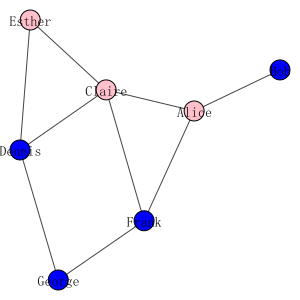

In [14]:
layout = g.layout("kamada_kawai")
g.vs["label"] = g.vs["name"]
color_dict = {"m": "blue", "f": "pink"}
g.vs["color"] = [color_dict[gender] for gender in g.vs["gender"]]
ig.plot(g, layout = layout, bbox = (300, 300), margin = 20)

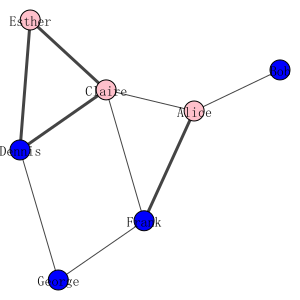

In [15]:
visual_style = {
    "vertex_size":20,
    "vertex_color":[color_dict[gender] for gender in g.vs["gender"]],
    "vertex_label" : g.vs["name"],
    "edge_width" : [1 + 2 * int(is_formal) for is_formal in g.es["is_formal"]],
    "layout":layout,
    "bbox":(300, 300),
    "margin":20
}
ig.plot(g, **visual_style)

In [16]:
# 读取邻接矩阵数据并绘制图
data = sio.loadmat('./testData.mat')
adj_matrix = np.array(data['NB'].todense())
type(adj_matrix)
adj_matrix.shape
sum(adj_matrix == adj_matrix.transpose())

numpy.ndarray

(200, 200)

array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,
       200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 20

In [17]:
?ig.Graph.Adjacency

Docstring:
Adjacency(matrix, mode=ADJ_DIRECTED)

Generates a graph from its adjacency matrix.

@param matrix: the adjacency matrix
@param mode: the mode to be used. Possible values are:

  - C{ADJ_DIRECTED} - the graph will be directed and a matrix
    element gives the number of edges between two vertex.
  - C{ADJ_UNDIRECTED} - alias to C{ADJ_MAX} for convenience.
  - C{ADJ_MAX}   - undirected graph will be created and the number of
    edges between vertex M{i} and M{j} is M{max(A(i,j), A(j,i))}
  - C{ADJ_MIN}   - like C{ADJ_MAX}, but with M{min(A(i,j), A(j,i))}
  - C{ADJ_PLUS}  - like C{ADJ_MAX}, but with M{A(i,j) + A(j,i)}
  - C{ADJ_UPPER} - undirected graph with the upper right triangle of
    the matrix (including the diagonal)
  - C{ADJ_LOWER} - undirected graph with the lower left triangle of
    the matrix (including the diagonal)

  These values can also be given as strings without the C{ADJ} prefix.
Type:      builtin_function_or_method


Clustering with 34 elements and 4 clusters
[0] 8, 9, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33
[1] 0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21
[2] 24, 25, 27, 28, 31
[3] 4, 5, 6, 10, 16


['#8ffbb3', '#f06960', '#15ce05', '#711212']

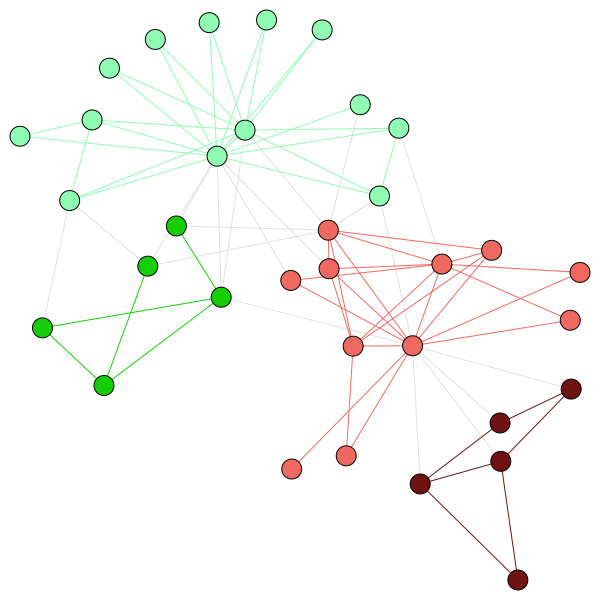

In [24]:
N = 200
g = ig.Graph.Famous('Zachary')
clusters = la.find_partition(g, la.ModularityVertexPartition)
# plot(clusters)
print(clusters)
member = clusters.membership
new_cmap = ['#'+''.join([random.choice('0123456789abcdef') for x in range(6)]) for z in range(len(clusters))]
new_cmap
vcolors = {v: new_cmap[i] for i, c in enumerate(clusters) for v in c}
g.vs["color"] = [vcolors[v] for v in g.vs.indices]
ecolors = {e.index: new_cmap[member[e.tuple[0]]] if member[e.tuple[0]]==member[e.tuple[1]] else "#e0e0e0" for e in g.es}
eweights = {e.index: (3*g.vcount()) if member[e.tuple[0]]==member[e.tuple[1]] else 0.1 for e in g.es}
g.es["weight"] = [eweights[e.index] for e in g.es]
g.es["color"] = [ecolors[e] for e in g.es.indices]
# visual_style["layout"] = g.layout_fruchterman_reingold(weights=g.es["weight"], maxiter=500, area=N ** 3, repulserad=N ** 3)
ig.plot(g, mark_groups = True)

In [35]:
g2 = ig.Graph.Adjacency(adj_matrix.tolist(), mode = ADJ_UNDIRECTED)
# g2.vs["label"] = ["agent{}".format(i) for i in range(1, 201)]
color_dict = {"m": "blue", "f": "pink"}
layout = g2.layout("kk")
clusters2 = la.find_partition(g2, la.ModularityVertexPartition)
ig.plot(clusters2, mark_groups = True)

NameError: name 'ADJ_UNDIRECTED' is not defined

In [43]:
g3 = ig.Graph.Famous('Zachary')
g.summary()
g.vcount()
g.ecount()
clusters3 = la.find_partition(g3,la.ModularityVertexPartition)

'IGRAPH U-W- 34 78 -- \n+ attr: color (v), color (e), weight (e)'

34

78

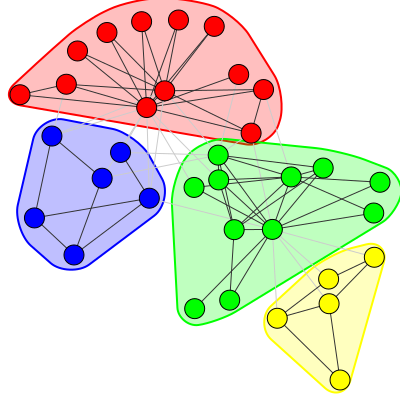

In [44]:
ig.plot(clusters3,  bbox = (0,0, 400,400),mark_groups = True)

In [28]:
g4 = ig.Graph.Read_Edgelist('email-Eu-core.txt', directed = True)
g4.vcount()
g4.ecount()
clusters4 = la.find_partition(g4,la.ModularityVertexPartition)

1005

25571